# Breast Cancer Dagnosis (Classification)





# Mounting Drive

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries and Reading Database





In [25]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/IDS_Project/breast-cancer-wisconsin.data",sep=",",header=None,names=['Id','Clump_thickness','Uniformity_of_cell_size',
                                                                                                              'Uniformity_of_cell_shape','Marginal_adhesion',
                                                                                                              'Single_epithelial_cell_size','Bare_nuclei',
                                                                                                              'Bland_chromatin','Normal_nucleoli','Mitoses',
                                                                                                              'Class'])
print("Imported data Info")
print()
df.info()

Imported data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_of_cell_size      699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [26]:
df

,Id,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


#Data Preprocessing





In [27]:
df.isnull()
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)


print("Dataset after removing the missing value records.")
print()
df.info()
df = df.drop(columns = 'Id')

Dataset after removing the missing value records.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           683 non-null    int64 
 1   Clump_thickness              683 non-null    int64 
 2   Uniformity_of_cell_size      683 non-null    int64 
 3   Uniformity_of_cell_shape     683 non-null    int64 
 4   Marginal_adhesion            683 non-null    int64 
 5   Single_epithelial_cell_size  683 non-null    int64 
 6   Bare_nuclei                  683 non-null    object
 7   Bland_chromatin              683 non-null    int64 
 8   Normal_nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


#Data Representation





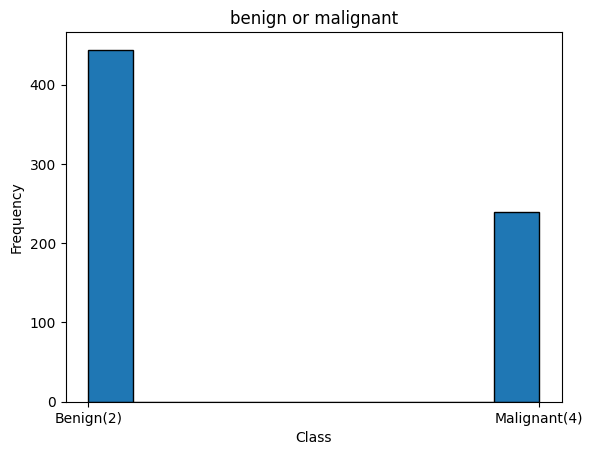

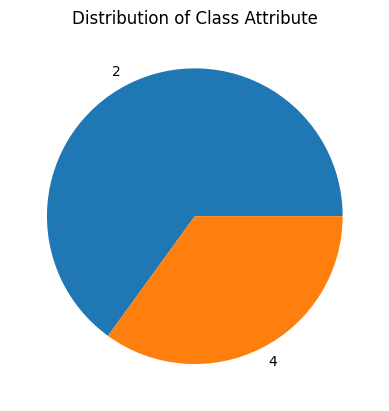

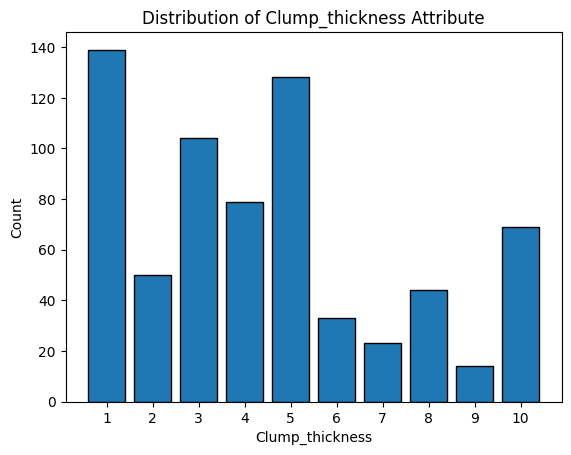

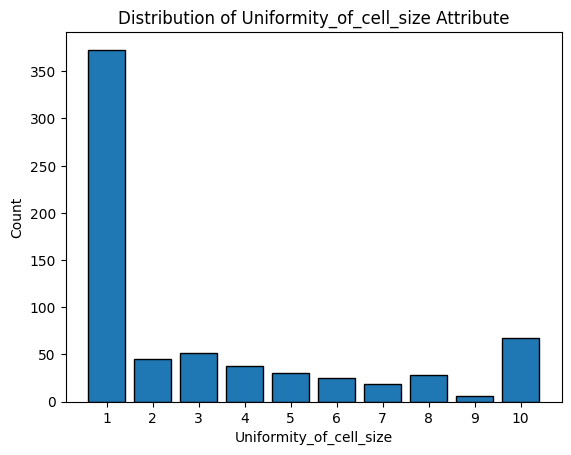

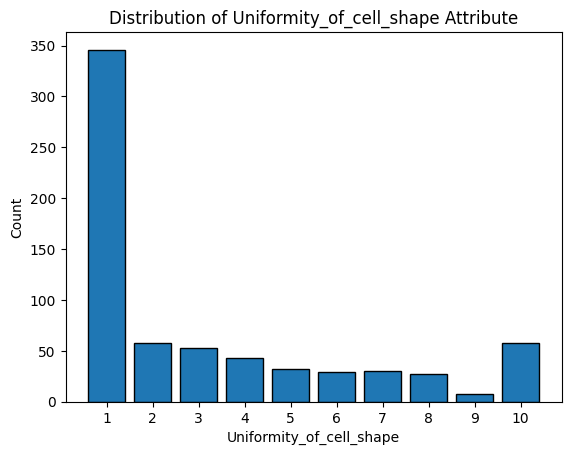

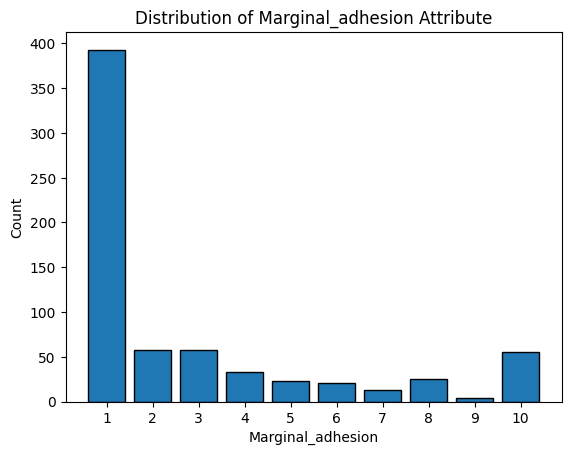

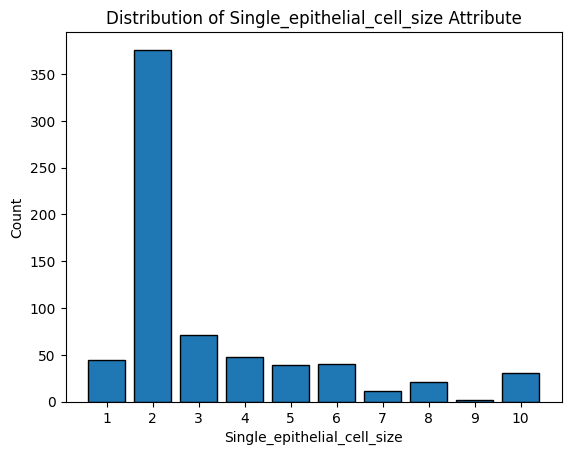

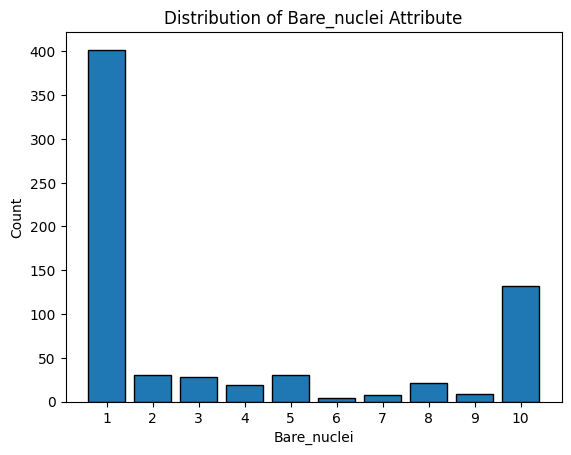

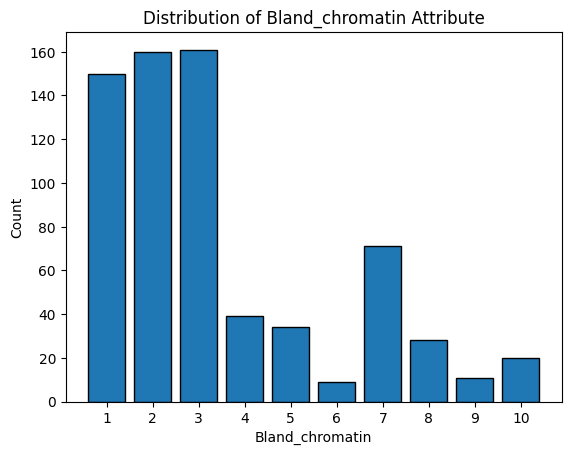

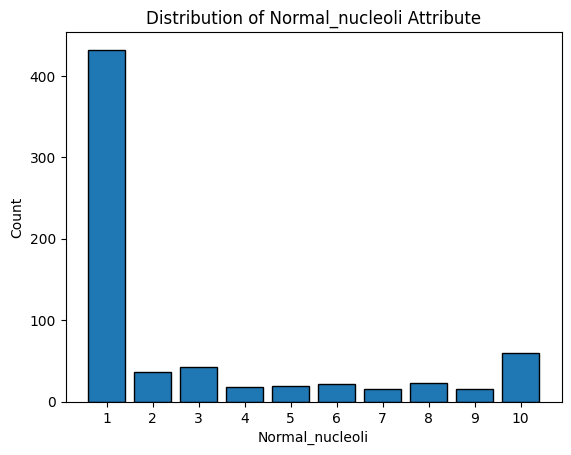

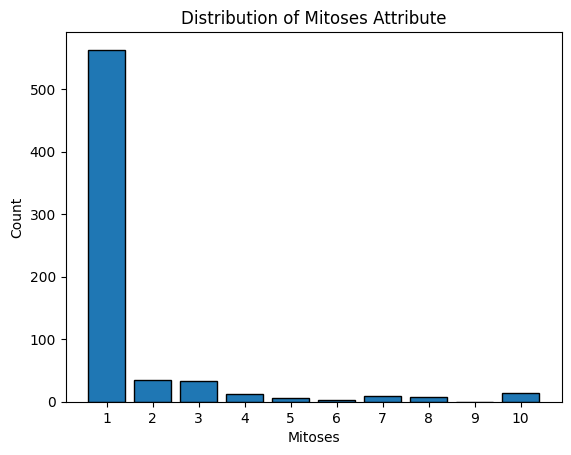

In [28]:
#Details of data

#Histogram for the class labels
class_labels = {2: 'Benign(2)', 4: 'Malignant(4)'}
plt.hist(df["Class"], edgecolor='black')
plt.xticks(list(class_labels.keys()), list(class_labels.values()))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("benign or malignant")
plt.show()

# Plot a pie chart of the class attribute
plt.pie(df['Class'].value_counts(), labels=df['Class'].unique())
plt.title('Distribution of Class Attribute')
plt.show()

# Plot a histogram of the Clump_thickness attribute
plt.hist(df['Clump_thickness'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Clump_thickness')
plt.ylabel('Count')
plt.title('Distribution of Clump_thickness Attribute')
plt.show()



# Plot a histogram plot of the Uniformity_of_cell_size attribute
plt.hist(df['Uniformity_of_cell_size'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Uniformity_of_cell_size')
plt.ylabel('Count')
plt.title('Distribution of Uniformity_of_cell_size Attribute')
plt.show()


# Plot a histogram plot of the Uniformity_of_cell_shape attribute
plt.hist(df['Uniformity_of_cell_shape'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Uniformity_of_cell_shape')
plt.ylabel('Count')
plt.title('Distribution of Uniformity_of_cell_shape Attribute')
plt.show()


# Plot a histogram plot of the Marginal_adhesion attribute
plt.hist(df['Marginal_adhesion'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Marginal_adhesion')
plt.ylabel('Count')
plt.title('Distribution of Marginal_adhesion Attribute')
plt.show()


# Plot a histogram plot of the Single_epithelial_cell_size attribute
plt.hist(df['Single_epithelial_cell_size'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Single_epithelial_cell_size')
plt.ylabel('Count')
plt.title('Distribution of Single_epithelial_cell_size Attribute')
plt.show()


# Plot a histogram plot of the Bare_nuclei attribute
df['Bare_nuclei'] = df['Bare_nuclei'].map({'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10})
plt.hist(df['Bare_nuclei'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Bare_nuclei')
plt.ylabel('Count')
plt.title('Distribution of Bare_nuclei Attribute')
plt.show()


# Plot a histogram plot of the Bland_chromatin attribute
plt.hist(df['Bland_chromatin'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Bland_chromatin')
plt.ylabel('Count')
plt.title('Distribution of Bland_chromatin Attribute')
plt.show()


# Plot a histogram plot of the Normal_nucleoli attribute
plt.hist(df['Normal_nucleoli'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Normal_nucleoli')
plt.ylabel('Count')
plt.title('Distribution of Normal_nucleoli Attribute')
plt.show()


# Plot a histogram plot of the Mitoses attribute
plt.hist(df['Mitoses'], bins=range(1, 12), edgecolor='black', align='left',rwidth=0.8)
plt.xticks(range(1, 11))
plt.xlabel('Mitoses')
plt.ylabel('Count')
plt.title('Distribution of Mitoses Attribute')
plt.show()


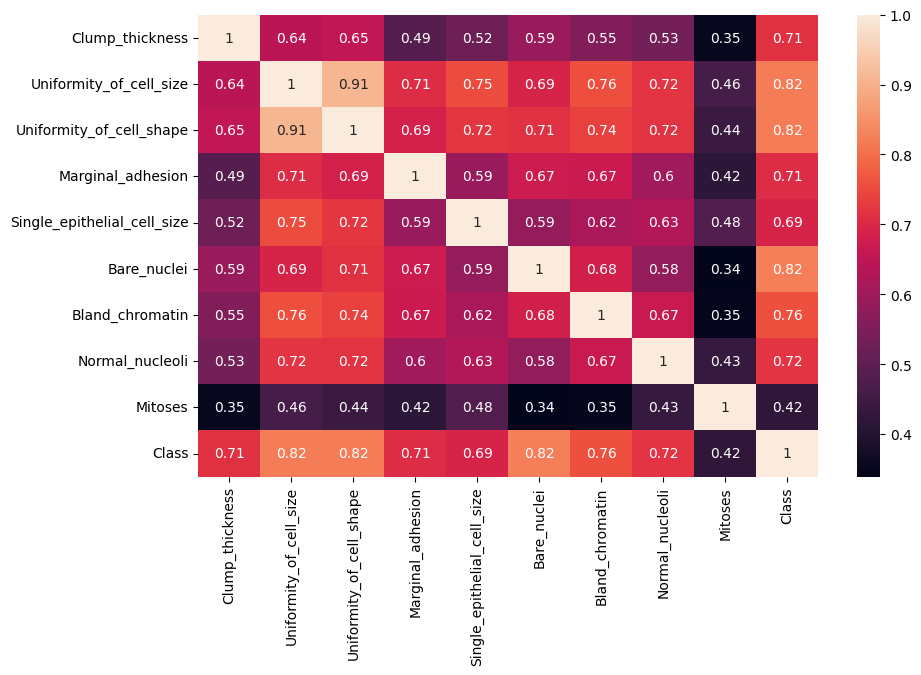

In [29]:
# Heat Map
corr_def = corr_df = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(data = corr_df, annot = True)
plt.show()

#Spliting Dataset into Training and Testing Data





In [32]:
y = df['Class']
columns_to_drop = ['Class']
X = df.drop(columns=columns_to_drop)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 24)

## Importing Required Libraries

In [33]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc2.fit_transform(X_test)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, mutual_info_classif


#Trying Different Models and Checking the accuracy





Logistic Regression Model:
Accuracy: 95.60975609756098
Precision: 94.49334478316874
Recall: 95.54945054945055


<Figure size 700x300 with 0 Axes>

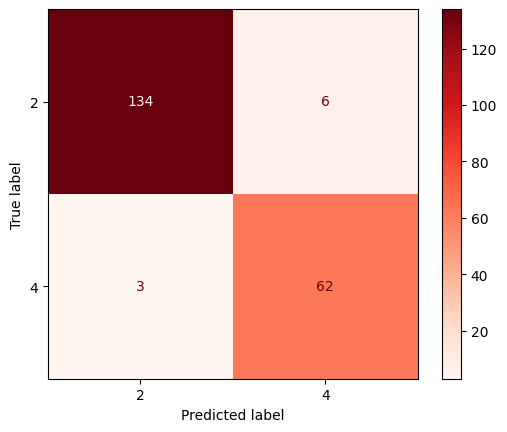

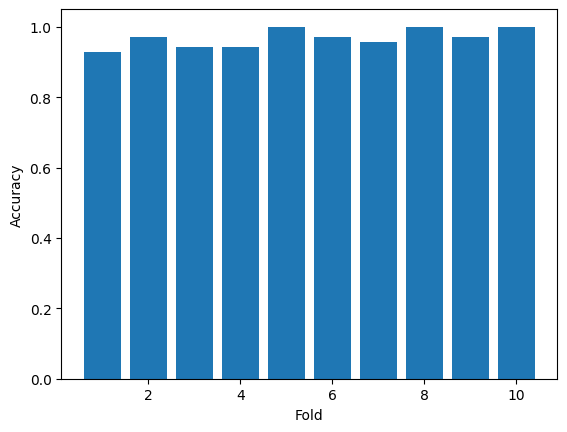

Decision Tree Classifier Model:
Accuracy: 96.09756097560975
Precision: 94.69728820685306
Recall: 96.73076923076923


<Figure size 700x300 with 0 Axes>

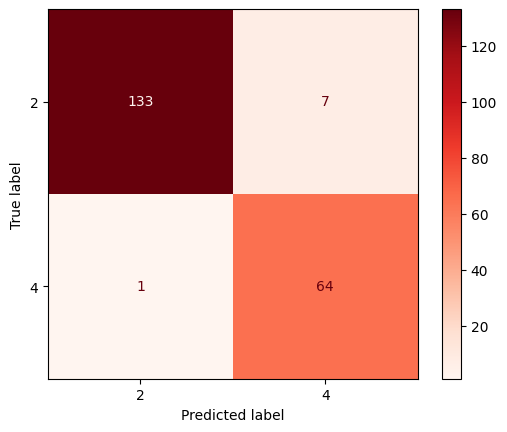

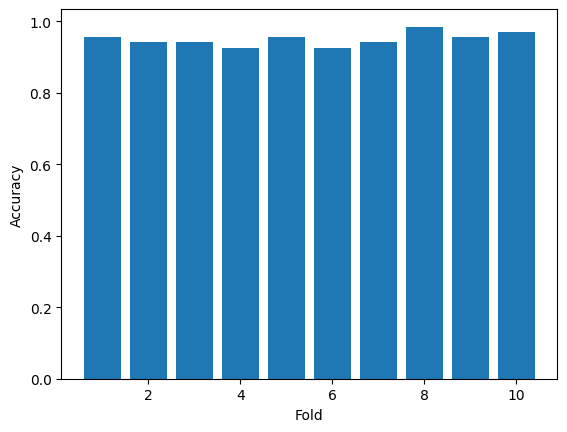

Gaussian Naive Bayes Model:
Accuracy: 94.6341463414634
Precision: 92.99812030075188
Recall: 95.24725274725274


<Figure size 700x300 with 0 Axes>

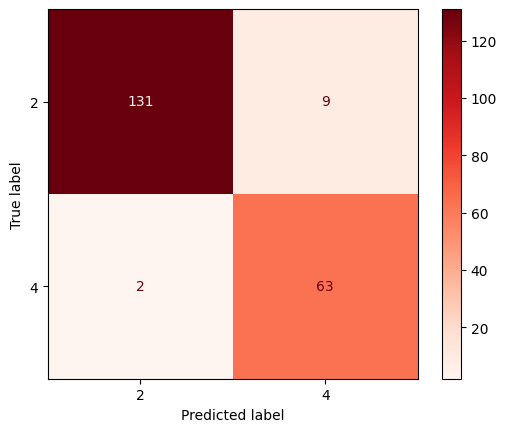

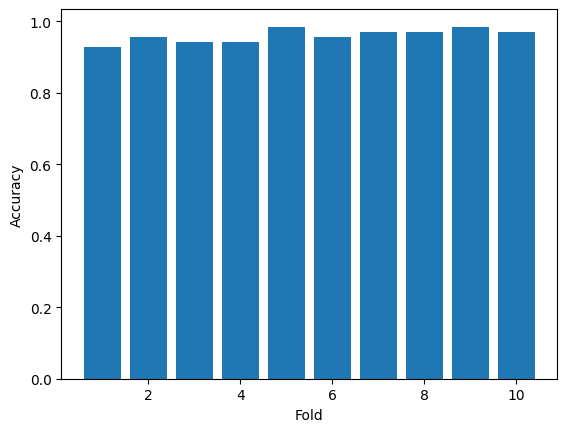

Random Forest Classifier Model:
Accuracy: 95.60975609756098
Precision: 94.25925925925927
Recall: 95.96153846153845


<Figure size 700x300 with 0 Axes>

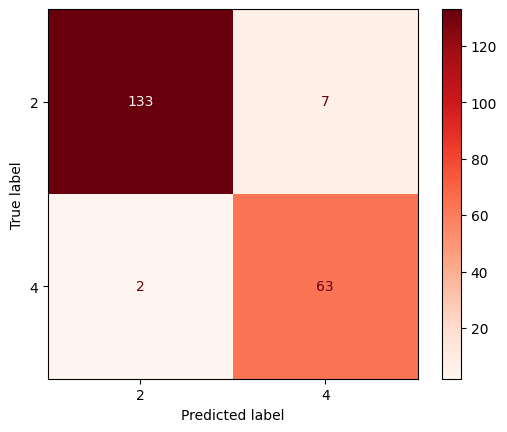

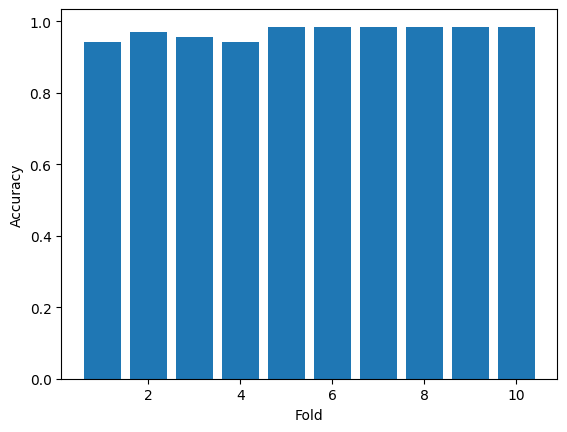

Support Vector Classifier Model:
Accuracy: 95.1219512195122
Precision: 93.61992852638217
Recall: 95.60439560439559


<Figure size 700x300 with 0 Axes>

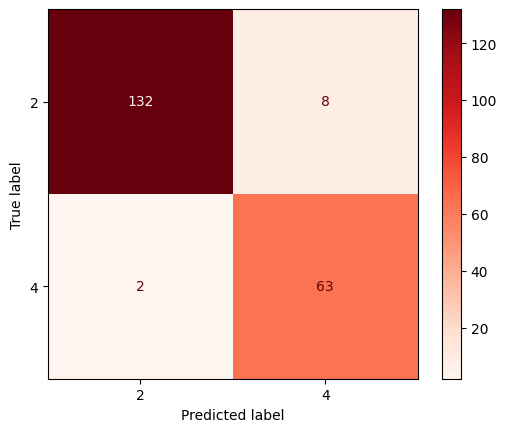

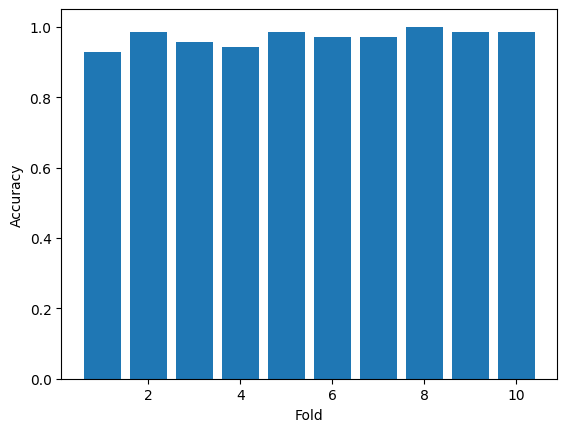

In [35]:

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

class_names = [2,4]
cm = confusion_matrix(y_test, y_pred, labels=class_names)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(7,3))
disp.plot(cmap=plt.cm.Reds)
plt.show()

scores = cross_val_score(model1, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Decision Tree Classifier Model:")
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

class_names = [2,4]
cm = confusion_matrix(y_test, y_pred, labels=class_names)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(7,3))
disp.plot(cmap=plt.cm.Reds)
plt.show()

scores = cross_val_score(model2, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Gaussian Naive Bayes Model:")
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

class_names = [2,4]
cm = confusion_matrix(y_test, y_pred, labels=class_names)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(7,3))
disp.plot(cmap=plt.cm.Reds)
plt.show()

scores = cross_val_score(model3, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Random Forest Classifier Model:")
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

class_names = [2,4]
cm = confusion_matrix(y_test, y_pred, labels=class_names)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(7,3))
disp.plot(cmap=plt.cm.Reds)
plt.show()


scores = cross_val_score(model4, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

model5 = SVC()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("Support Vector Classifier Model:")
print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

class_names = [2,4]
cm = confusion_matrix(y_test, y_pred, labels=class_names)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(7,3))
disp.plot(cmap=plt.cm.Reds)
plt.show()

scores = cross_val_score(model5, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

#Using Grid Search for hyperparameters tuning(for best model Random Forest Classifier)




In [36]:
# Tune the model's hyperparameters using grid search
param_grid = {'max_depth': [2, 5, 10, 20, 50], 'min_samples_split': [2, 5, 10, 20]}
grid_search = GridSearchCV(model4, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')


# Perform feature selection using recursive feature elimination
selector = RFE(model4, n_features_to_select=9)
selector.fit(X_train, y_train)

# Print the selected features
print(f'Selected features: {df.columns[:-1][selector.support_]}')

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2}
Best score: 0.98
Selected features: Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses'],
      dtype='object')


#Testing model





In [37]:
# Reshape the data into a two-dimensional array
data = np.array([[1099510,10,4,3,1,3,3,6,5,2,4],
[1100524,6,10,10,2,8,10,7,3,3,4],
[1102573,5,6,5,6,10,1,3,1,1,4]])

# Create the DataFrame
new_data = pd.DataFrame(data)

y_true = new_data[10]
new_data = new_data.drop(10,axis=1)
new_data = new_data.drop(0,axis=1)

# Use the model to predict the labels for the new data
new_data_pred = model4.predict(new_data)

# Actual Label
print(f'Actual Labels: {list(y_true)}')
# Print the predictions
print(f'Predictions: {new_data_pred}')

Actual Labels: [4, 4, 4]
Predictions: [4 4 4]
